# **Classification of a dataset which not linearly separable using SVM Classifier**

In [22]:
#dataset from https://www.kaggle.com/datasets/rohitudageri/credit-card-details?select=Credit_card.csv

!unzip "/content/archive (3).zip"

Archive:  /content/archive (3).zip
  inflating: Credit_card.csv         
  inflating: Credit_card_label.csv   


In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("/content/Credit_card.csv")
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [25]:
from sklearn.preprocessing import LabelEncoder
columns_to_label_encode = ["GENDER", "Car_Owner", "Propert_Owner", "Type_Income", "EDUCATION", "Marital_status", "Housing_type", "Type_Occupation"]
for column in columns_to_label_encode:
  data[column] = LabelEncoder().fit_transform(data[column].values)


In [26]:
labels = pd.read_csv("/content/Credit_card_label.csv")
data= pd.merge(data, labels, on = "Ind_ID")
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,18,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,NaN,-586,1,1,1,0,18,2,1
3,5009749,0,1,0,0,NaN,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,NaN,0,1,1,1,-11957.0,-2182,1,0,0,0,10,2,0
1544,5023655,0,0,0,0,225000.0,0,2,3,1,-10229.0,-1209,1,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,3,1,1,1,-13174.0,-2477,1,0,0,0,10,4,0
1546,5118219,1,1,0,0,270000.0,3,4,0,1,-15292.0,-645,1,1,1,0,4,2,0


In [ ]:
data.isna().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [27]:
data = data.dropna()

In [28]:
data = data.drop("Ind_ID", axis = 1)

In [29]:
y = data.pop("label")
X = data.loc[:, ["Annual_income", "Employed_days"]]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

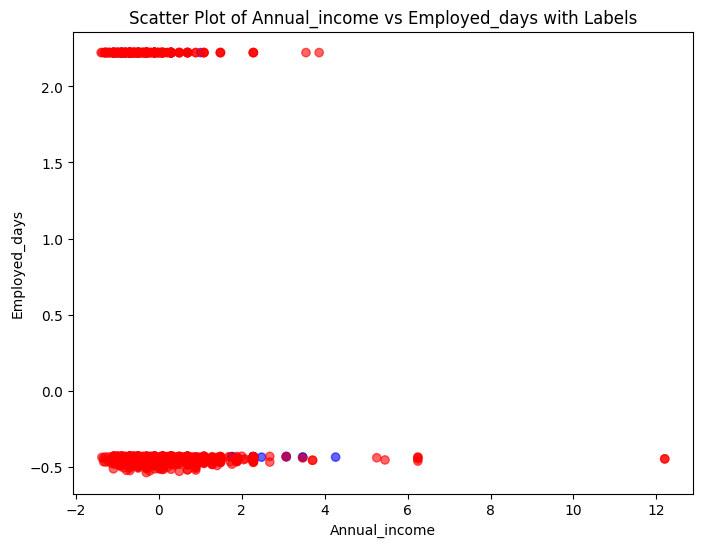

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'blue'}

# Use direct mapping of colors based on the 'y' values
scatter = plt.scatter(X[:, 0], X[:, 1], c=y.map(colors), alpha=0.6)

plt.title('Scatter Plot of Annual_income vs Employed_days with Labels')
plt.xlabel('Annual_income')
plt.ylabel('Employed_days')



plt.show()


In [34]:
from sklearn.svm import SVC
from sklearn import metrics
#scale implies 1 / (n_features * X.var())
svm = SVC(C=2, kernel="poly", degree=3, gamma="scale")
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=["0","1"]))


Accuracy: 0.9093
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       451
           1       0.00      0.00      0.00        45

    accuracy                           0.91       496
   macro avg       0.45      0.50      0.48       496
weighted avg       0.83      0.91      0.87       496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Comparison of SVM, KNN, Naive Bayes and Rocchio Classifiers**

In [7]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

In [ ]:
newsgroups.target_names

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
# Initialize classifiers
classifiers = {
    'SVM': SVC(C=1, kernel='rbf', gamma='scale'),
    'Naive Bayes': MultinomialNB(),
    'Rocchio': NearestCentroid(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [11]:
# Train and evaluate each classifier
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'F1 Score': []}
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)

    Classifier  Accuracy  Precision  F1 Score
0          SVM  0.684423   0.703759  0.684984
1  Naive Bayes  0.678693   0.705498  0.671717
2      Rocchio  0.629881   0.695195  0.648287
3          KNN  0.156197   0.754559  0.180427


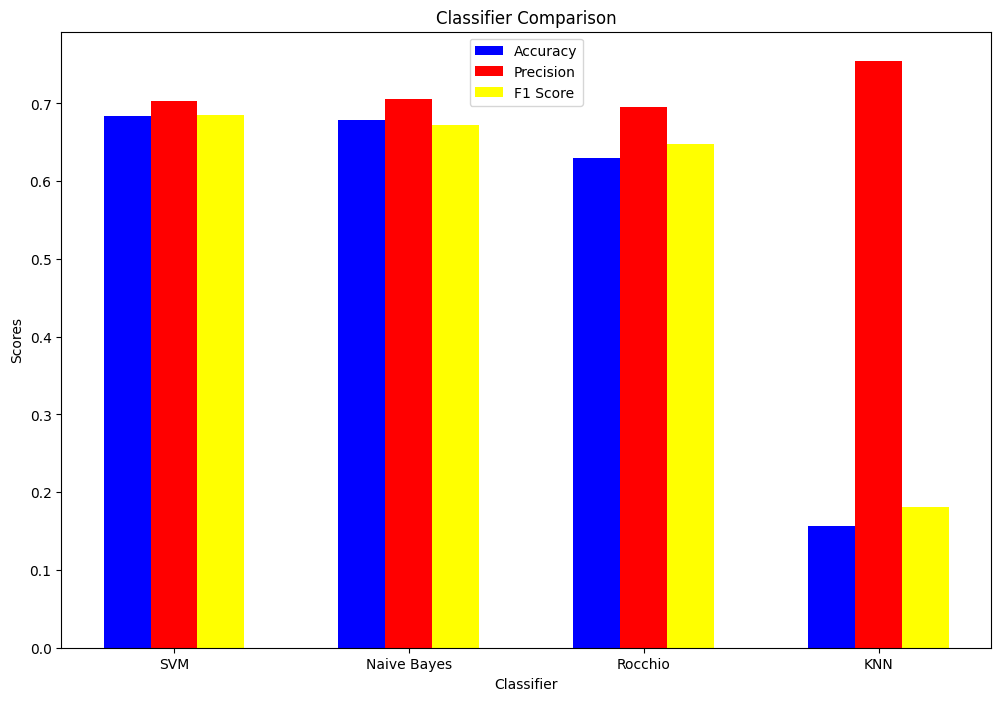

In [16]:
# Create a comparison chart
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 8))

bar_width = 0.2
index = range(len(results_df['Classifier']))

# Bar plot for Accuracy
plt.bar(index, results_df['Accuracy'], width=bar_width, label='Accuracy', color='blue')

# Bar plot for Precision
plt.bar([i + bar_width for i in index], results_df['Precision'], width=bar_width, label='Precision', color='red')

# Bar plot for F1 Score
plt.bar([i + 2 * bar_width for i in index], results_df['F1 Score'], width=bar_width, label='F1 Score', color='yellow')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Classifier Comparison')
plt.xticks([i + bar_width for i in index], results_df['Classifier'])
plt.legend()
plt.show()
